<a href="https://colab.research.google.com/github/VidushiSharma31/iris-classification/blob/main/iris.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Iris Classification with a Neural Network

This notebook demonstrates how to build and train a simple neural network using TensorFlow and Keras to classify the Iris dataset.

In [259]:
import numpy as np
import pandas as pd
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay, accuracy_score, precision_score, recall_score, f1_score

## Data Loading and Preprocessing

This section loads the Iris dataset and performs necessary preprocessing steps, including splitting the data into training and testing sets and scaling the features.

In [2]:
iris = datasets.load_iris()
X = iris.data
y = iris.target

In [8]:
iris_df = pd.DataFrame(data=iris.data, columns=iris.feature_names)
iris_df['species'] = iris.target_names[iris.target]

In [10]:
print(iris_df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   sepal length (cm)  150 non-null    float64
 1   sepal width (cm)   150 non-null    float64
 2   petal length (cm)  150 non-null    float64
 3   petal width (cm)   150 non-null    float64
 4   species            150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB
None


In [17]:
iris_df

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,virginica
146,6.3,2.5,5.0,1.9,virginica
147,6.5,3.0,5.2,2.0,virginica
148,6.2,3.4,5.4,2.3,virginica


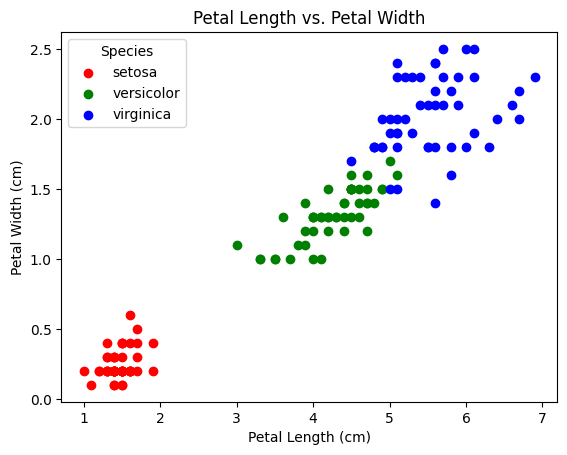

In [66]:
colors = {'setosa': 'red', 'versicolor': 'green', 'virginica': 'blue'}
fig, ax = plt.subplots()

for species_name, color in colors.items():
    subset = iris_df[iris_df['species'] == species_name]
    ax.scatter(subset['petal length (cm)'], subset['petal width (cm)'],
               color=color, label=species_name)

plt.title('Petal Length vs. Petal Width')
plt.xlabel('Petal Length (cm)')
plt.ylabel('Petal Width (cm)')
ax.legend(title='Species')
plt.show()

In [19]:
print(iris_df['species'].value_counts())

species
setosa        50
versicolor    50
virginica     50
Name: count, dtype: int64


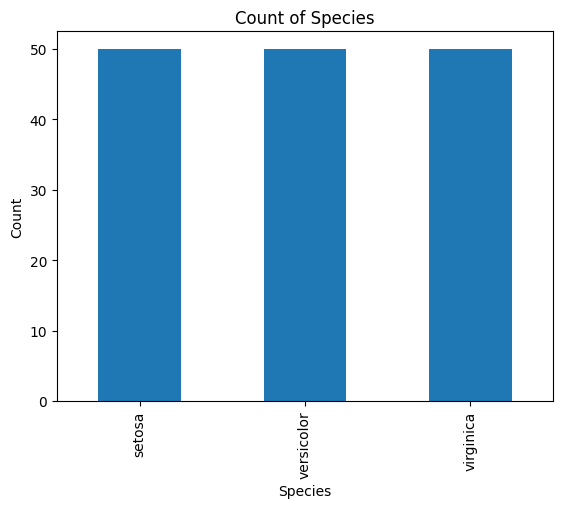

In [27]:
species_counts = iris_df['species'].value_counts()
species_counts.plot(kind='bar')
plt.title('Count of Species')
plt.xlabel('Species')
plt.ylabel('Count')
plt.show()

In [31]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

In [32]:
print("X_train shape:", X_train.shape)
print("y_train shape:", y_train.shape)
print("X_test shape:", X_test.shape)
print("y_test shape:", y_test.shape)

X_train shape: (120, 4)
y_train shape: (120,)
X_test shape: (30, 4)
y_test shape: (30,)


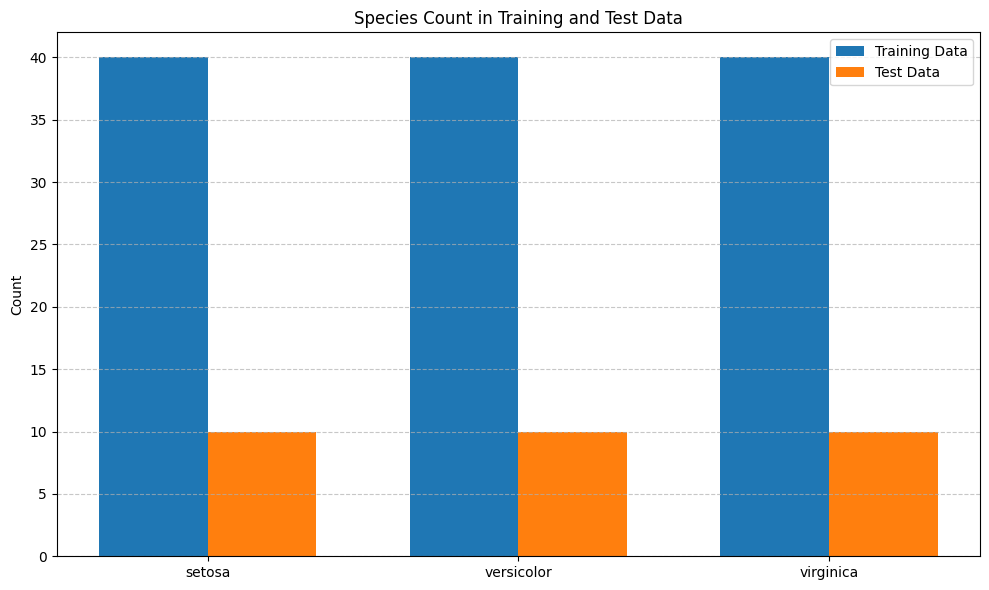

In [58]:
unique_train, counts_train = np.unique(y_train, return_counts=True)
y_train_counts = dict(zip(iris.target_names[unique_train], counts_train))

unique_test, counts_test = np.unique(y_test, return_counts=True)
y_test_counts = dict(zip(iris.target_names[unique_test], counts_test))

# Create a DataFrame for plotting
df_counts = pd.DataFrame({
    'Species': list(y_train_counts.keys()),
    'Train_Count': list(y_train_counts.values()),
    'Test_Count': list(y_test_counts.values())
})

# Plotting
fig, ax = plt.subplots(figsize=(10, 6))

species_labels = df_counts['Species']
x = np.arange(len(species_labels)) # the label locations
width = 0.35 # the width of the bars

rects1 = ax.bar(x - width/2, df_counts['Train_Count'], width, label='Training Data')
rects2 = ax.bar(x + width/2, df_counts['Test_Count'], width, label='Test Data')

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Count')
ax.set_title('Species Count in Training and Test Data')
ax.set_xticks(x)
ax.set_xticklabels(species_labels)
ax.legend()
ax.grid(axis='y', linestyle='--', alpha=0.7)

fig.tight_layout()
plt.show()

In [37]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [ ]:
target_names = ['setosa', 'versicolor', 'virginica']
labels = [0, 1, 2]

In [290]:
results=[]

## Logistic Regression

In [149]:
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression(random_state=42)
lr.fit(X_train_scaled, y_train)
y_pred_lr = lr.predict(X_test_scaled)

print("Logistic Regression Accuracy:", accuracy_score(y_test, y_pred_lr))

Logistic Regression Accuracy: 0.9333333333333333


              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        10
  versicolor       0.90      0.90      0.90        10
   virginica       0.90      0.90      0.90        10

    accuracy                           0.93        30
   macro avg       0.93      0.93      0.93        30
weighted avg       0.93      0.93      0.93        30



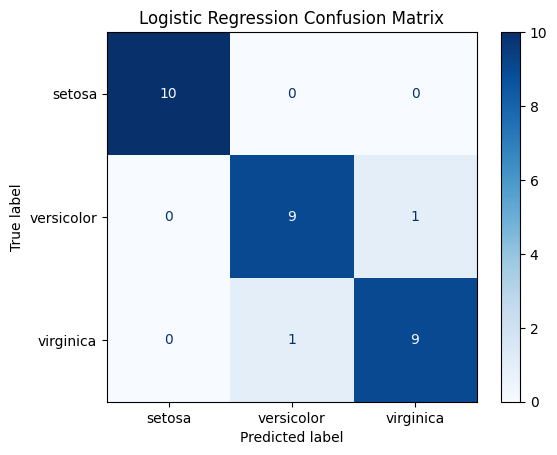

In [150]:
print(classification_report(y_test, y_pred_lr, target_names=target_names))
cm = confusion_matrix(y_test, y_pred_lr)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=target_names)
disp.plot(cmap='Blues', values_format='d')
plt.title('Logistic Regression Confusion Matrix')
plt.show()

In [291]:
results.append(['Logistic Regression',
                accuracy_score(y_test, y_pred_lr),
                precision_score(y_test, y_pred_lr, average='weighted'),
                recall_score(y_test, y_pred_lr, average='weighted'),
                f1_score(y_test, y_pred_lr, average='weighted')])

## Naive Bayes

In [160]:
from sklearn.naive_bayes import GaussianNB

nb = GaussianNB()
nb.fit(X_train_scaled, y_train)
y_pred_nb = nb.predict(X_test_scaled)

print("Naive Bayes Accuracy:", accuracy_score(y_test, y_pred_nb))

Naive Bayes Accuracy: 0.9666666666666667


              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        10
  versicolor       1.00      0.90      0.95        10
   virginica       0.91      1.00      0.95        10

    accuracy                           0.97        30
   macro avg       0.97      0.97      0.97        30
weighted avg       0.97      0.97      0.97        30



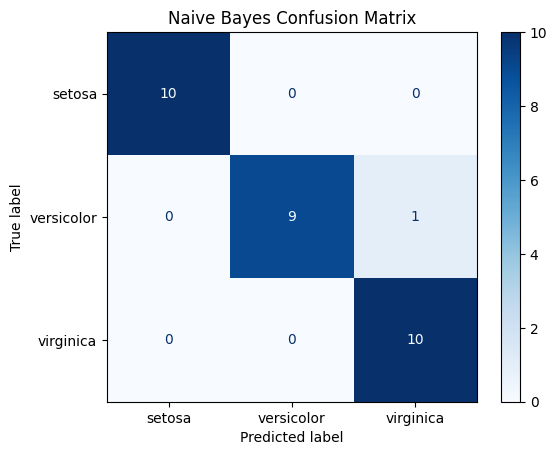

In [161]:
print(classification_report(y_test, y_pred_nb, target_names=target_names))
cm = confusion_matrix(y_test, y_pred_nb)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=target_names)
disp.plot(cmap='Blues', values_format='d')
plt.title('Naive Bayes Confusion Matrix')
plt.show()

In [292]:
results.append(['Naive Bayes',
                accuracy_score(y_test, y_pred_nb),
                precision_score(y_test, y_pred_nb, average='weighted'),
                recall_score(y_test, y_pred_nb, average='weighted'),
                f1_score(y_test, y_pred_nb, average='weighted')])

## KNN

KNN Accuracy: 0.9333333333333333
              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        10
  versicolor       0.83      1.00      0.91        10
   virginica       1.00      0.80      0.89        10

    accuracy                           0.93        30
   macro avg       0.94      0.93      0.93        30
weighted avg       0.94      0.93      0.93        30



Text(0.5, 1.0, 'KNN Confusion Matrix')

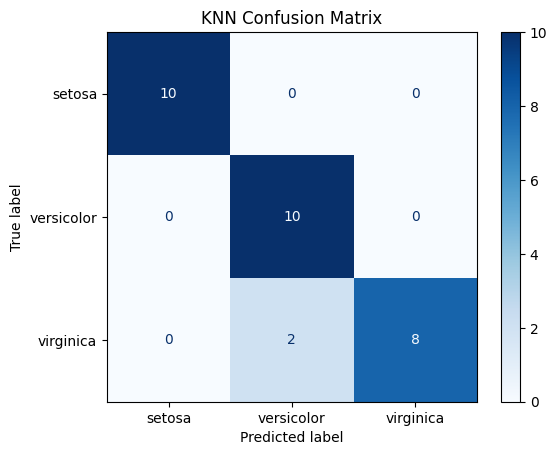

In [136]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X_train_scaled, y_train)
y_pred_knn = knn.predict(X_test_scaled)

print("KNN Accuracy:", accuracy_score(y_test, y_pred_knn))
print(classification_report(y_test, y_pred_knn, target_names=target_names))
cm = confusion_matrix(y_test, y_pred_knn)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=target_names)
disp.plot(cmap='Blues', values_format='d')
plt.title('KNN Confusion Matrix')

In [293]:
results.append(['KNN',
                accuracy_score(y_test, y_pred_knn),
                precision_score(y_test, y_pred_knn, average='weighted'),
                recall_score(y_test, y_pred_knn, average='weighted'),
                f1_score(y_test, y_pred_knn, average='weighted')])

## Decision Tree

In [294]:
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
dt = DecisionTreeClassifier(max_depth=3, random_state=42)
dt.fit(X_train_scaled, y_train)
y_pred_dt = dt.predict(X_test_scaled)

print("Decision Tree Accuracy:", accuracy_score(y_test, y_pred_dt))

Decision Tree Accuracy: 0.9666666666666667


              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        10
  versicolor       1.00      0.90      0.95        10
   virginica       0.91      1.00      0.95        10

    accuracy                           0.97        30
   macro avg       0.97      0.97      0.97        30
weighted avg       0.97      0.97      0.97        30



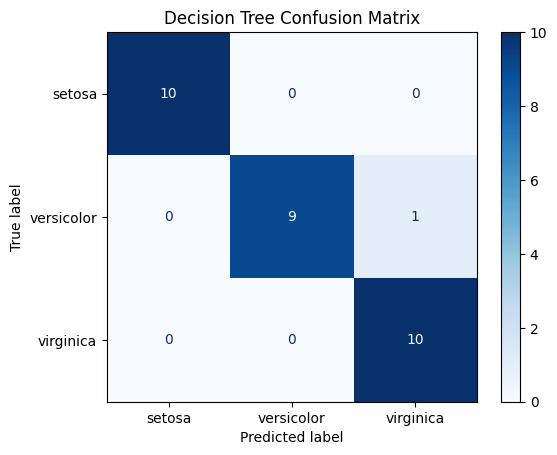

In [295]:
print(classification_report(y_test, y_pred_dt, target_names=target_names))
cm = confusion_matrix(y_test, y_pred_dt)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=target_names)
disp.plot(cmap='Blues', values_format='d')
plt.title('Decision Tree Confusion Matrix')
plt.show()

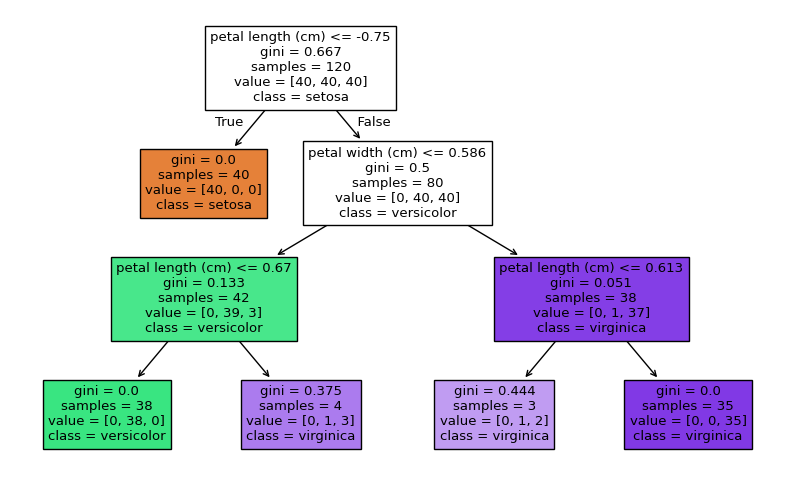

In [296]:
fig = plt.figure(figsize=(10, 6))
_ = tree.plot_tree(dt,
                   feature_names=iris.feature_names,
                   class_names=iris.target_names,
                   filled=True)

In [297]:
results.append(['Decision Tree',
                accuracy_score(y_test, y_pred_dt),
                precision_score(y_test, y_pred_dt, average='weighted'),
                recall_score(y_test, y_pred_dt, average='weighted'),
                f1_score(y_test, y_pred_dt, average='weighted')])

## Random Forest

Random Forest Accuracy: 0.9666666666666667
              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        10
  versicolor       1.00      0.90      0.95        10
   virginica       0.91      1.00      0.95        10

    accuracy                           0.97        30
   macro avg       0.97      0.97      0.97        30
weighted avg       0.97      0.97      0.97        30



Text(0.5, 1.0, 'Random Forest Confusion Matrix')

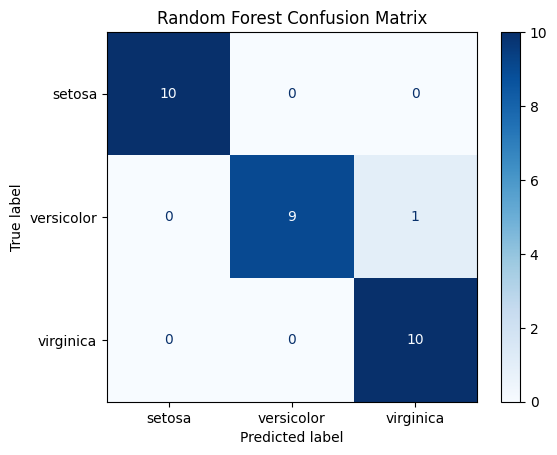

In [298]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(n_estimators=100, max_depth=3, random_state=42)
rf.fit(X_train_scaled, y_train)
y_pred_rf = rf.predict(X_test_scaled)

print("Random Forest Accuracy:", accuracy_score(y_test, y_pred_rf))
print(classification_report(y_test, y_pred_rf, target_names=target_names))
cm = confusion_matrix(y_test, y_pred_rf)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=target_names)
disp.plot(cmap='Blues', values_format='d')
plt.title('Random Forest Confusion Matrix')

In [299]:
results.append(['Random Forest',
                accuracy_score(y_test, y_pred_rf),
                precision_score(y_test, y_pred_rf, average='weighted'),
                recall_score(y_test, y_pred_rf, average='weighted'),
                f1_score(y_test, y_pred_rf, average='weighted')])

## SVM

In [300]:
from sklearn.svm import SVC

svm = SVC(kernel='linear', random_state=42)
svm.fit(X_train_scaled, y_train)
y_pred_svm = svm.predict(X_test_scaled)

print("SVM Accuracy:", accuracy_score(y_test, y_pred_svm))

SVM Accuracy: 1.0


              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        10
  versicolor       1.00      1.00      1.00        10
   virginica       1.00      1.00      1.00        10

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30



Text(0.5, 1.0, 'SVM Confusion Matrix')

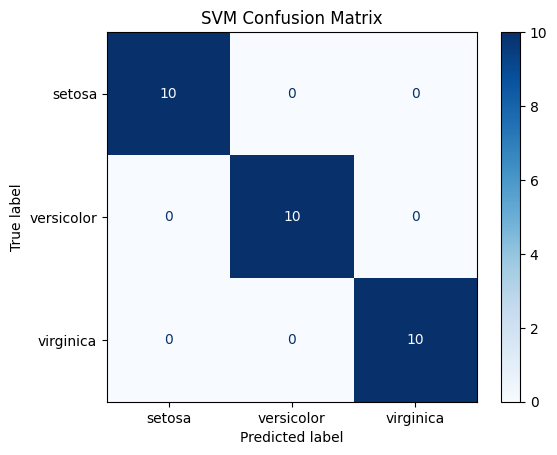

In [301]:
print(classification_report(y_test, y_pred_svm, target_names=target_names))
cm = confusion_matrix(y_test, y_pred_svm)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=target_names)
disp.plot(cmap='Blues', values_format='d')
plt.title('SVM Confusion Matrix')

In [302]:
results.append(['SVM',
                accuracy_score(y_test, y_pred_svm),
                precision_score(y_test, y_pred_svm, average='weighted'),
                recall_score(y_test, y_pred_svm, average='weighted'),
                f1_score(y_test, y_pred_svm, average='weighted')])

In [218]:
X_train_2d = X_train_scaled[:, [2, 3]]
X_test_2d  = X_test_scaled[:, [2, 3]]

svm = SVC(kernel='linear', random_state=42)
svm.fit(X_train_2d, y_train)

y_pred_svm = svm.predict(X_test_2d)
print("SVM Accuracy:", accuracy_score(y_test, y_pred_svm))

x_min, x_max = X_train_2d[:, 0].min() - 0.5, X_train_2d[:, 0].max() + 0.5
y_min, y_max = X_train_2d[:, 1].min() - 0.5, X_train_2d[:, 1].max() + 0.5

xx, yy = np.meshgrid(
    np.linspace(x_min, x_max, 300),
    np.linspace(y_min, y_max, 300)
)
Z = svm.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

SVM Accuracy: 0.9333333333333333


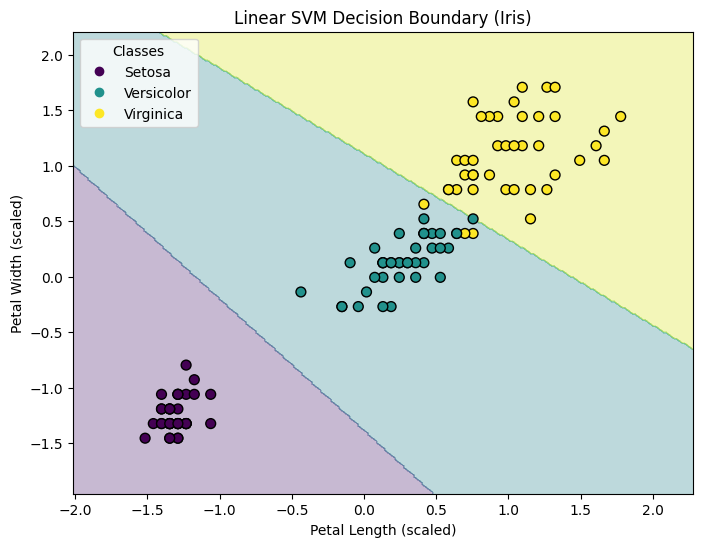

In [240]:
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.lines import Line2D

plt.figure(figsize=(8, 6))

# Decision regions
plt.contourf(xx, yy, Z, alpha=0.3)

# Scatter points
scatter = plt.scatter(
    X_train_2d[:, 0],
    X_train_2d[:, 1],
    c=y_train,
    edgecolor='k',
    s=50
)

plt.xlabel("Petal Length (scaled)")
plt.ylabel("Petal Width (scaled)")
plt.title("Linear SVM Decision Boundary (Iris)")

handles, _ = scatter.legend_elements(prop="colors")
labels=['Setosa', 'Versicolor', 'Virginica']
plt.legend(handles=handles, title="Classes", labels=labels)
plt.show()


## Neural Network

In [281]:
model = Sequential([Dense(25, activation='relu'),
                    Dense(15, activation='relu'),
                    Dense(3, activation='softmax')])

## Model Definition and Training

Here, we define the architecture of the neural network using Keras's Sequential API, compile the model with an optimizer and loss function, and train it on the preprocessed training data.

In [282]:
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=1e-3), loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True), metrics=['accuracy'])

In [283]:
model.fit(X_train_scaled, y_train, epochs = 100, verbose=0)

/usr/local/lib/python3.12/dist-packages/keras/src/backend/tensorflow/nn.py:717: UserWarning: "`sparse_categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a Softmax activation and thus does not represent logits. Was this intended?
  output, from_logits = _get_logits(


## Model Evaluation

This section evaluates the trained model's performance on the test set and prints the accuracy.

In [284]:
test_loss, test_acc = model.evaluate(X_test_scaled, y_test, verbose=0)
print(f"Test Accuracy: {test_acc * 100:.2f}%")

Test Accuracy: 93.33%


## Prediction on Sample Data

Finally, we use the trained model to make predictions on a few sample data points from the test set and compare the predicted classes with the true labels.

In [285]:
y_pred = model.predict(X_test_scaled)
print("Predicted Classes:", np.argmax(y_pred, axis=1))
print("True Classes:", y_test)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 106ms/step
Predicted Classes: [0 2 1 1 0 1 0 0 2 1 2 2 2 1 0 0 0 1 1 2 0 2 1 1 2 2 1 0 2 0]
True Classes: [0 2 1 1 0 1 0 0 2 1 2 2 2 1 0 0 0 1 1 2 0 2 1 2 2 1 1 0 2 0]


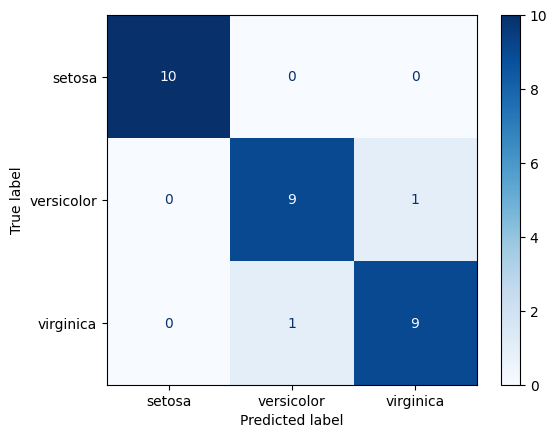

In [286]:
cm = confusion_matrix(y_test, np.argmax(y_pred, axis=1))
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=target_names)
disp.plot(cmap='Blues', values_format='d')

In [303]:
results.append(['Neural Network',
                test_acc,
                precision_score(y_test, np.argmax(y_pred, axis=1), average='weighted'),
                recall_score(y_test, np.argmax(y_pred, axis=1), average='weighted'),
                f1_score(y_test, np.argmax(y_pred, axis=1), average='weighted')])

In [304]:
results_df = pd.DataFrame(results, columns=['Model', 'Accuracy', 'Precision', 'Recall', 'F1-Score'])

In [305]:
results_df

,Model,Accuracy,Precision,Recall,F1-Score
0,Logistic Regression,0.933333,0.933333,0.933333,0.933333
1,Naive Bayes,0.966667,0.969697,0.966667,0.966583
2,KNN,0.933333,0.944444,0.933333,0.932660
3,Decision Tree,0.966667,0.969697,0.966667,0.966583
4,Random Forest,0.966667,0.969697,0.966667,0.966583
5,SVM,1.000000,1.000000,1.000000,1.000000
6,Neural Network,0.933333,0.933333,0.933333,0.933333


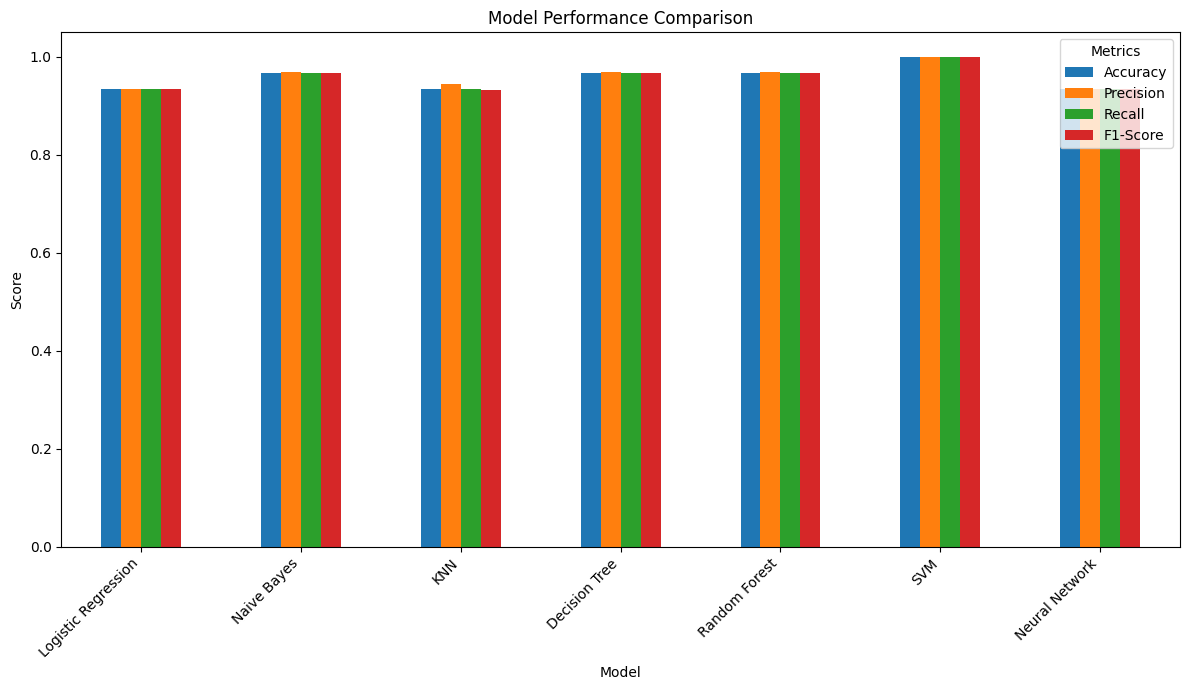

In [309]:
metrics_df = results_df.set_index('Model')[[
    'Accuracy', 'Precision', 'Recall', 'F1-Score'
]]

metrics_df.plot(kind='bar', figsize=(12, 7))

plt.title('Model Performance Comparison')
plt.xlabel('Model')
plt.ylabel('Score')
plt.xticks(rotation=45, ha='right')
plt.ylim(0, 1.05)
plt.legend(title='Metrics')
plt.tight_layout()
plt.show()